In [2]:
import numpy as np
import ps_utils
import numpy.linalg as la
import matplotlib.pyplot as plt
from enum import Enum

In [3]:
class Datasets(Enum):
    BEETHOVEN = 'Beethoven'
    MAT = 'mat_vase'
    SHINY = 'shiny_vase'
    SHINY2 = 'shiny_vase2'
    BUDDHA = 'Buddha'
    FACE = 'face'

In [4]:
I, mask, S = ps_utils.read_data_file(Datasets.BEETHOVEN.value)
print(I.shape)
print(mask.shape)
print(S.shape)
count_Is = I.shape[2]

(256, 256, 3)
(256, 256)
(3, 3)


In [5]:
nz = np.nonzero(mask)
count_nz = len(nz[0])

count_nz

28898

In [6]:
J = np.vstack([I[:, :, i][nz] for i in range(3)])
assert (J.shape == (count_Is, count_nz))

In [7]:
M = np.linalg.inv(S) @ J

In [8]:
Rho = la.norm(M, axis=0)
N = M / np.tile(Rho, (count_Is, 1))

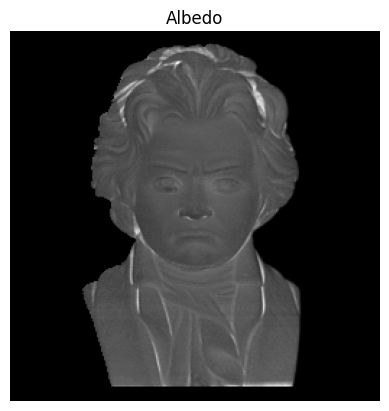

In [9]:
albedo = np.zeros(mask.shape)
albedo[nz] = Rho

plt.imshow(albedo, cmap='gray')
plt.axis('off')
plt.title('Albedo')
plt.show()

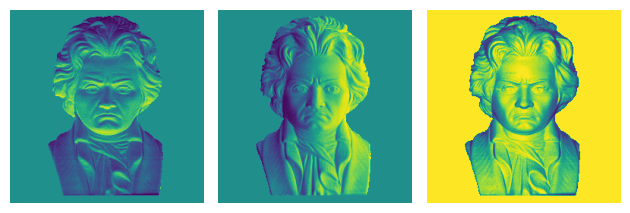

In [10]:
n1 = np.zeros(mask.shape)
n2 = np.zeros(mask.shape)
n3 = np.ones(mask.shape)

n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

_, (ax1, ax2, ax3) = plt.subplots(1, count_Is)
ax1.imshow(n1)
ax1.axis('off')
ax2.imshow(n2)
ax2.axis('off')
ax3.imshow(n3)
ax3.axis('off')
plt.tight_layout()
plt.show()

In [11]:
z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z, albedo=M)

AssertionError: 